In [1]:
import pandas as pd
import numpy as np
import math
import random
%matplotlib inline
import random
from matplotlib import pyplot
import os
from sklearn import preprocessing

df = pd.read_csv('/Users/eduardorodriguez/Desktop/TFM/DATA/banksim/banksim.csv')
df.head()

le = preprocessing.LabelEncoder()
le.fit(list(set(df['category'])))
df['category'] = le.transform(df['category'])

le.fit(list(set(df['age'])))
df['age'] = le.transform(df['age'])

le.fit(list(set(df['gender'])))
df['gender'] = le.transform(df['gender'])

df_data = df
#X = df.loc[(df.category == 'es_sportsandtoys') | (df.category == 'es_fashion') | (df.category == 'es_travel') | (df.category == 'es_home') |(df.category == 'es_health') | (df.category == 'es_leisure') | df.category == 'es_tech') | (df.category == 'es_otherservices') | (df.category == 'es_barsandrestaurants') |(df.category == 'es_hyper') | (df.category == 'es_wellnessandbeauty')]
y_true = df_data['fraud']

df = df.drop(['customer', 'merchant', 'zipMerchant', 'zipcodeOri'], axis = 1)
df = df.rename(index=str, columns={"fraud": "Class"})
df_data = df_data.drop(['customer', 'merchant', 'zipMerchant', 'zipcodeOri', 'fraud'], axis = 1)

df_data.head()

,step,age,gender,category,amount
0,0,4,2,12,4.55
1,0,2,2,12,39.68
2,0,4,1,12,26.89
3,0,3,2,12,17.25
4,0,5,2,12,35.72


In [13]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor ## Only available with scikit-learn 0.19 and later
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
X_train, X_test, y_train, y_test = train_test_split(df_data, y_true, test_size=0.3, random_state=42)

In [14]:
## Not valid for LOF
def predict(X,mdlLst):
    y_pred=np.zeros(X.shape[0])
    for clf in mdlLst:
        y_pred=np.add(y_pred,clf.decision_function(X).reshape(X.shape[0],))
    y_pred=(y_pred*1.0)/len(mdlLst)
    return y_pred

In [15]:
## Not valid for LOF
def train(X,clf,ensembleSize=5,sampleSize=10000):
    mdlLst=[]
    for n in range(ensembleSize):
        X=df_data.sample(sampleSize)
        clf.fit(X)
        mdlLst.append(clf)
    
    return mdlLst

In [16]:
acuracy = []
precision = []
recall = []
f1 = []
timekm = []
for i in ['linear', 'poly', 'rbf', 'sigmoid']:
    print('Type of Kernel: ' + str(i), end='')
    print('\\\\')
    print('\\\\')
    alg=OneClassSVM(kernel=i,gamma='auto', coef0=0.0, tol=0.001, nu=0.5, \
                shrinking=True, cache_size=200, verbose=False, max_iter=-1, random_state=42)
    
    %%timeit
    osvm_mdlLst=train(X_train,alg)
    osvm_mdlLst=train(X_train,alg)
    %%timeit
    osvm_y_pred=predict(X_test,osvm_mdlLst)

    #Creating class labels based on decision function
    osvm_y_pred_class=osvm_y_pred.copy()
    osvm_y_pred_class[osvm_y_pred<0]=1
    osvm_y_pred_class[osvm_y_pred>=0]=0
    
    osvm_y_pred=predict(X_test,osvm_mdlLst)

    #Creating class labels based on decision function
    osvm_y_pred_class=osvm_y_pred.copy()
    osvm_y_pred_class[osvm_y_pred<0]=1
    osvm_y_pred_class[osvm_y_pred>=0]=0
    
    roc_auc_score(y_test, osvm_y_pred_class)
    osvm_cm=confusion_matrix(y_test, osvm_y_pred_class)
    
    knn_accuracy_score=accuracy_score(y_test, osvm_y_pred_class)
    knn_precison_score=precision_score(y_test, osvm_y_pred_class)
    knn_recall_score=recall_score(y_test, osvm_y_pred_class)
    knn_f1_score=f1_score(y_test, osvm_y_pred_class)

    print("One Class Suport Vector Machine\\\\")
    print("Confusion Matrix\\\\")
    print("tn =",osvm_cm[0][0],"fp =",osvm_cm[0][1], end='')
    print('\\\\')
    print("fn =",osvm_cm[1][0],"tp =",osvm_cm[1][1], end='')
    print('\\\\')
    print("Scores", end='')
    print('\\\\')
    print("Accuracy -->",knn_accuracy_score, end='')
    print('\\\\')
    print("Precison -->",knn_precison_score, end='')
    print('\\\\')
    print("Recall -->",knn_recall_score, end='')
    print('\\\\')
    print("F1 -->",knn_f1_score, end='')
    print('\\\\')
    print('\\\\')
    print('\\\\')
    
    acuracy += [knn_accuracy_score,]
    precision += [knn_precison_score,]
    recall += [knn_recall_score,]
    f1 += [knn_f1_score,]

Type of Kernel: linear\\
\\
One Class Suport Vector Machine\\
Confusion Matrix\\
tn = 87731 fp = 88546\\
fn = 1892 tp = 224\\
Scores\\
Accuracy --> 0.4930406462136967\\
Precison --> 0.0025233750140813338\\
Recall --> 0.10586011342155009\\
F1 --> 0.004929252030015624\\
\\
\\
Type of Kernel: poly\\
\\
One Class Suport Vector Machine\\
Confusion Matrix\\
tn = 86889 fp = 89388\\
fn = 1894 tp = 222\\
Scores\\
Accuracy --> 0.4883095188712562\\
Precison --> 0.0024774020756611987\\
Recall --> 0.10491493383742911\\
F1 --> 0.004840503237904193\\
\\
\\
Type of Kernel: rbf\\
\\
One Class Suport Vector Machine\\
Confusion Matrix\\
tn = 51617 fp = 124660\\
fn = 0 tp = 2116\\
Scores\\
Accuracy --> 0.30120576480018835\\
Precison --> 0.016690856313497822\\
Recall --> 1.0\\
F1 --> 0.03283369022127052\\
\\
\\
Type of Kernel: sigmoid\\
\\
One Class Suport Vector Machine\\
Confusion Matrix\\
tn = 175500 fp = 777\\
fn = 2113 tp = 3\\
Scores\\
Accuracy --> 0.9837998127729227\\
Precison --> 0.0038461538461538

ValueError: X.shape[0] should be equal to X.shape[1]

Text(0.5,0,'Acuracy Scores')

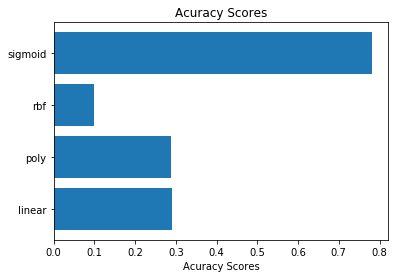

In [19]:
pyplot.title('Acuracy Scores')
pyplot.barh(['linear', 'poly', 'rbf', 'sigmoid'], list(map(lambda x: x - min(acuracy) + 0.1, acuracy)), align='center')
pyplot.xlabel('Acuracy Scores')

Text(0.5,0,'Precision Scores')

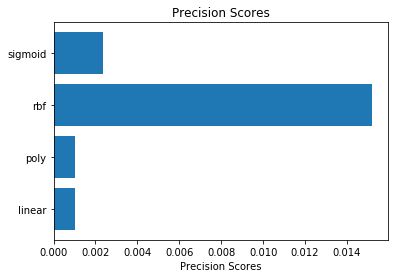

In [25]:
pyplot.title('Precision Scores')
pyplot.barh(['linear', 'poly', 'rbf', 'sigmoid'], list(map(lambda x: x - min(precision) + 0.001, precision)), align='center')
pyplot.xlabel('Precision Scores')

Text(0.5,0,'Recall Scores')

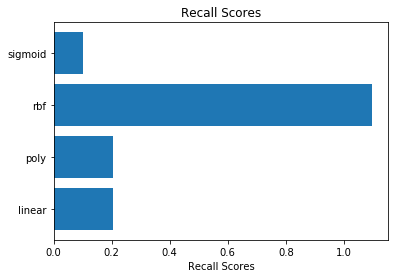

In [22]:
pyplot.title('Recall Scores')
pyplot.barh(['linear', 'poly', 'rbf', 'sigmoid'], list(map(lambda x: x - min(recall) + 0.1, recall)), align='center')
pyplot.xlabel('Recall Scores')

Text(0.5,0,'F1 Scores')

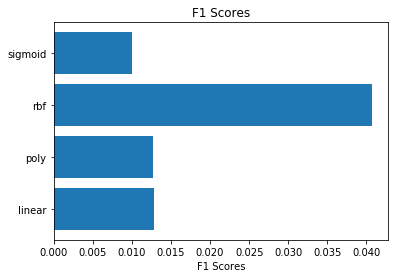

In [24]:
pyplot.title('F1 Scores')
pyplot.barh(['linear', 'poly', 'rbf', 'sigmoid'], list(map(lambda x: x - min(f1) + 0.01, f1)), align='center')
pyplot.xlabel('F1 Scores')